<a href="https://colab.research.google.com/github/eomtaehyeon/Hongong_ML-DL-/blob/main/Chapter_6_1_%EC%97%84%ED%83%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습
- vs 지도학습
  + 종속변수 = 타겟
- 비지도학습은 종속변수 및 타겟이 없음
  + 외부의 도움 없이 스스로 유용한 무언가를 학습
  + 군집, 차원 축소
- 분류
  + 다중분류
  + 전제조건이 (다양한 유형) 데이터가 많아야 함
  + 딥러닝과 연관이 됨 (자연어처리, 이미지)



# 데이터 불러오기

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 03:05:50--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 03:05:50--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 03:05:50--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

- numpy 파일을 불러옴.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('/content/fruits_300.npy')
print(fruits.shape)
print(fruits.ndim)

(300, 100, 100)
3


- 첫번째 차원 (300) = 샘플의 개수
- 두번째 차원(100) = 이미지 높이
- 세번째 차원(100) = 이미지 너비
- 이미지 크기 100 X 100


In [3]:
fruits[0,0, :]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

- 이미지 시각화
  + 흑백 사진을 담고 있다.
  + 0 ~ 255까지의 정숫값을 가진다.
- 0에 가까우면 검게 나타남
- 255에 가까우면 밝게 나타남


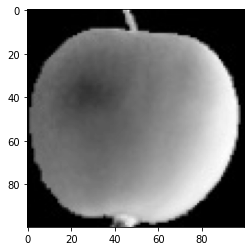

In [4]:
plt.imshow(fruits[6], cmap = 'gray')
plt.show()

- cmap = 'gray_r' : 색반전
- 0에 가까우면 밝게 나타남
- 255에 가까우면 검게 나타남

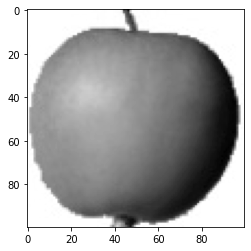

In [5]:
plt.imshow(fruits[6], cmap = 'gray_r')
plt.show()

- 여러 이미지 시각화



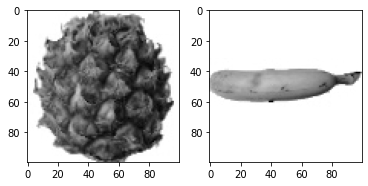

In [6]:
# 파인애플, 바나나 이미지
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')

plt.show()

# 픽셀값 분석
- 사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나로 나눔.
- 넘파이 배열을 나눌 때 100 x 100 이미지 길이가 10,000인 1차원 배열
  + 이미지 출력하긴 어렵지만, 배열을 계산할 때 편리.
  

In [7]:
apple = fruits[0:100].reshape(-1, 100 * 100)
pineapple = fruits[100:200].reshape(-1, 100 * 100)
banana = fruits[200:300].reshape(-1, 100 * 100)

print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


- axis =0 vs axis = 1 차이 확인
  + axis = 0으로 하면 행을 따라 계산
  + axis = 1으로 하면 열을 따라 계산

- 각 이미지에 대한 픽셀 평균값 비교

In [8]:
# axis = 1 열.
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


- 각 과일에 대한 히스토그램 작성
  + 히스토그램은 값이 발생한 빈도를 그래프로 표시한 것.
  + x축이 값의 구간(계급), y축은 발생 빈도(도수).


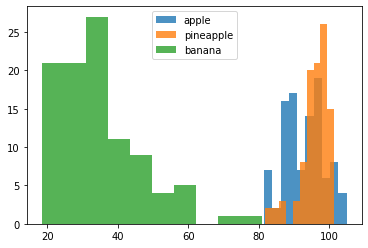

In [17]:
# alpha 매개변수 : 투명도 ( <1)
plt.hist(np.mean(apple, axis =1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis =1), alpha = 0.8)
plt.hist(np.mean(banana, axis =1), alpha = 0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

- 바나나의 사진은 평균 값은 40 아래,
- 사과와 파인애플은 90~100 사이
- 사과와 파인애플은 픽셀값만으로 구분하기 어렵다.


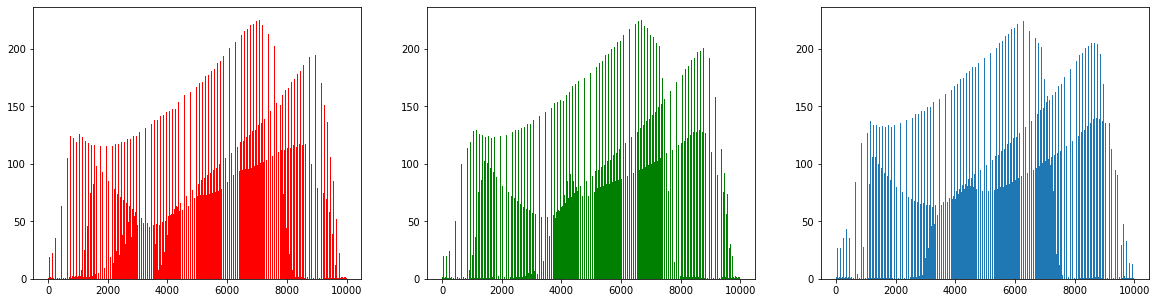

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0), color='red')
axs[1].bar(range(10000), np.mean(apple, axis=0), color='green')
axs[2].bar(range(10000), np.mean(apple, axis=0))
plt.show()

- 사과는 사진 아래쪽으로 갈수록 값이 높음.
- 파인애플은 비교적 고르면서 높음.
- 바나나는 중앙의 픽셀값이 높음.

- 대표 이미지

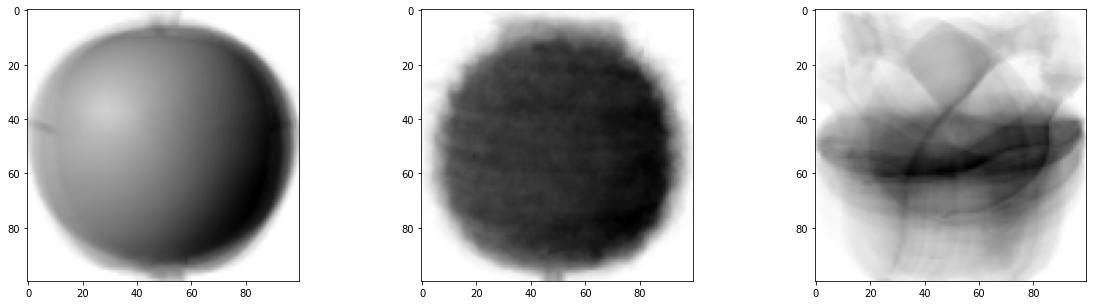

In [11]:
# 픽셀 평균값을 100*100
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

fig, axs = plt. subplots(1,3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')

plt.show()

# 평균값과 가까운 사진 고르기

In [21]:
# 넘파이 abs()함수 이용 : 절댓값 계산.
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)
print(abs_mean)


(300,)
[17.37576  13.508874 17.183394 15.68311  17.983306 20.565392 16.795812
 16.144276 19.611994 21.32059  16.454222 16.590134 13.37039  17.23263
 15.92806  15.496638 18.582212 16.48196  27.651556 19.7871   20.826912
 16.417934 17.059946 15.904296 15.086176 19.371364 24.076362 14.777732
 19.20517  20.805182 14.797906 18.658418 15.973216 13.04259  18.381052
 16.59904  16.288504 18.960586 13.88574  16.497594 18.40376  19.174642
 29.096702 18.40849  28.223962 21.42994  19.740466 15.590532 13.082678
 18.765996 14.391198 21.464746 26.261028 15.887148 18.568706 16.410426
 17.108034 13.178824 18.199846 13.503056 20.845032 16.898184 22.81774
 18.99896  19.102706 16.636216 14.845644 19.357872 14.778086 14.468082
 13.085526 15.946606 20.42774  16.241996 13.720382 18.416166 15.229106
 16.411342 13.47148  20.050622 17.296816 21.071312 18.451708 19.645494
 15.585712 20.582004 13.850318 13.269222 21.875262 17.152098 15.60477
 23.890138 14.442124 18.794826 15.750524 16.58135  19.375552 17.802096
 1

- 오차의 값이 가장 작은 순서대로 오차를 골라본다.
  + np.argsort() 함수는 작은것에서 큰순서대로 나열

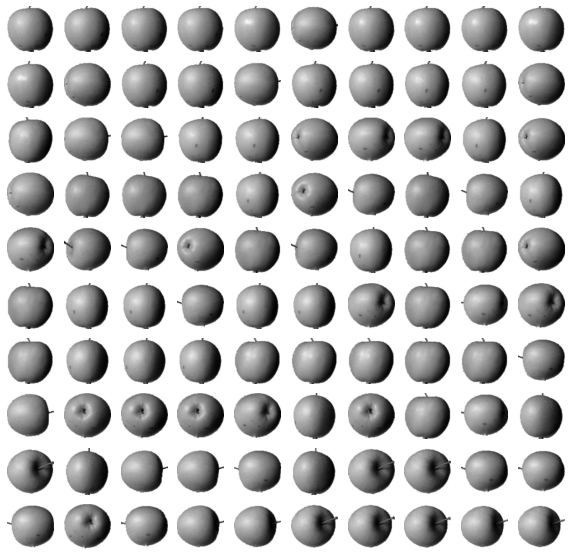

In [13]:
# 사과
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

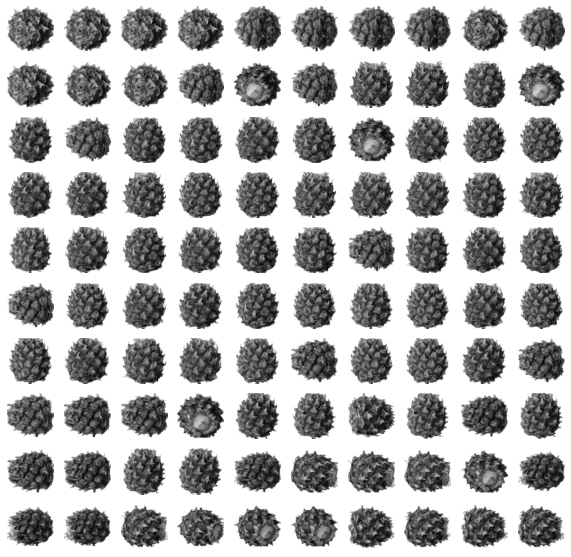

In [25]:
# 파인애플
pineapple_index = np.argsort(abs_mean)[100:200]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[pineapple_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

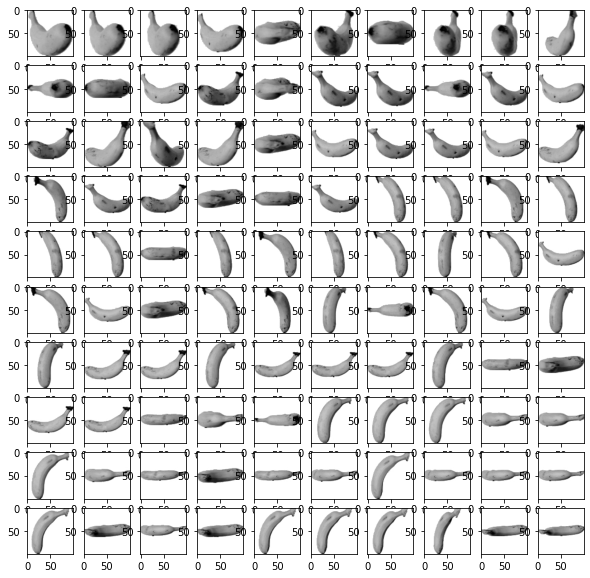

In [26]:
# banana
banana_index = np.argsort(abs_mean)[200:300]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[banana_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('on')    # aixs ('on') 좌표축을 그린다.
plt.show()

- 군집 : 비슷한 샘플끼리 하나의 그룹으로 모으는 작업
  + 대표적인 비지도 학습 작업 중 하나
  + 군집 알고리즘으로 모은 샘플 그룹을 클러스터


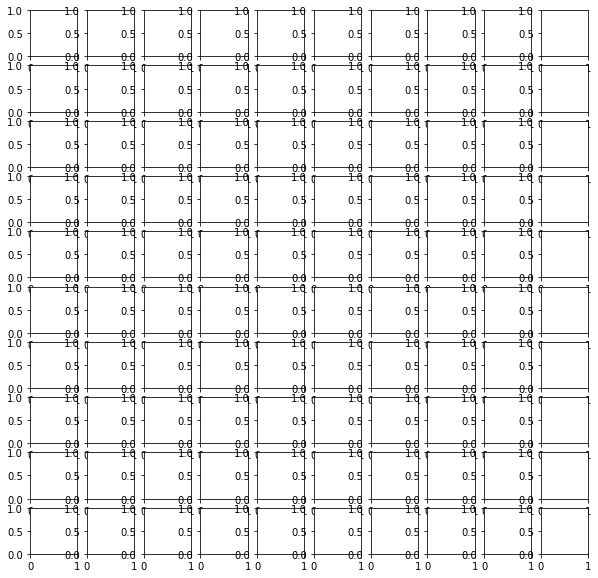

In [14]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))

plt.show()